> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.



### Question(s) for Analysis
>1- dose receving sms make difference?

>2-is gender effect on showing?

>3-is sscholarship effect on showing?

>4-is age effect on showing?

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# assessing data and Data Wrangling
1-dataset shape
2-data types
3-missing value
4-incorrect values
6-duplicates
in this we document data cleaning steps in mark-down cells precisely and justify your cleaning decisions.


# general properties

In [294]:
# Load your data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [295]:
#inspect datatypes and look for instances of missing or possibly errant data.
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [296]:
df.shape

(110527, 14)

this data include :
110527 raw and 14 column

In [297]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is a mistake the min of age is -1 and that is impossible i will drop it in data cleaning

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [299]:
df.duplicated().sum()

0

the dataset have no duplicated 

In [300]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

there is no missing data 

In [301]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

thete is aunique value in handcap


### Data Cleaning
remove columns that do not have meaning

1- remove and drop the wrong value of age -1

In [302]:
df.drop(df.query("Age == -1").index, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [303]:
#drop and remove all unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1 , inplace = True)
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


there is some tyops in the nameing of this columns 
hipertension , no show and handcap 
i will correct them to have aclean data

In [304]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace =True)
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


# ##general Exploration of the dataset


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null int64
Hypertension     110526 non-null int64
Diabetes         110526 non-null int64
Alcoholism       110526 non-null int64
Handicap         110526 non-null int64
SMS_received     110526 non-null int64
No_show          110526 non-null object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


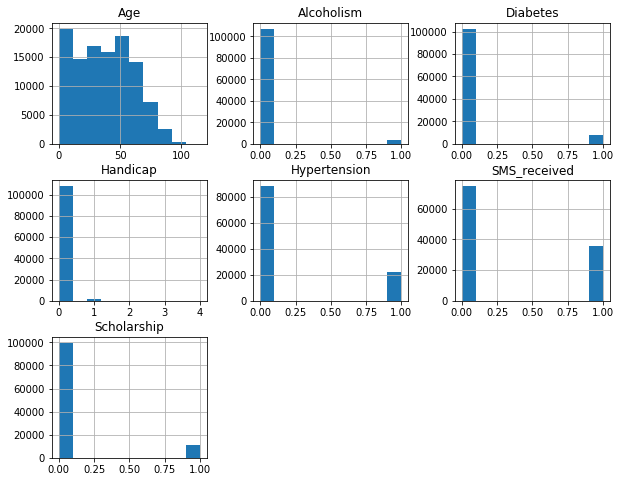

In [306]:
#overview of the columns as a histogram 
df.hist(figsize= (10,8));

In [307]:
show = df.No_show == "No"
df.head(6)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No


In [308]:
notshow = df.No_show == "Yes"
df.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


In [309]:
showed.shape

(110526,)

In [310]:
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handicap         88207
SMS_received     88207
No_show          88207
dtype: int64

In [311]:
df[notshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
dtype: int64

### dose receving sms make difference?

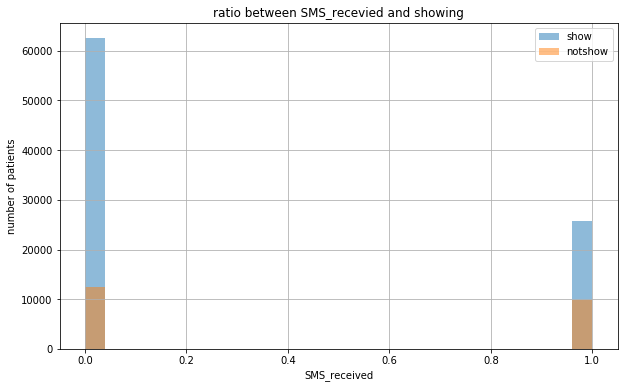

In [312]:
plt.figure(figsize=[10,6])
df.SMS_received[show].hist(alpha=0.5, bins=25, label='show')
df.SMS_received[notshow].hist(alpha=0.5, bins=25, label='notshow')
plt.xlabel('SMS_received')
plt.ylabel('number of patients')
plt.title('ratio between SMS_recevied and showing')
plt.legend();

# is gender effect on showing?

In [313]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

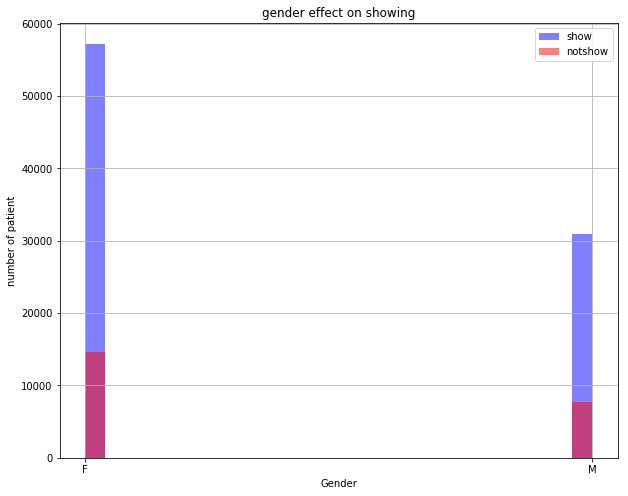

In [314]:
plt.figure(figsize=[10,8])
df.Gender[show].hist(alpha=0.5, bins=25, label='show', color='blue')
df.Gender[notshow].hist(alpha=0.5, bins=25, label='notshow', color='red')
plt.title('gender effect on showing')
plt.xlabel('Gender')
plt.ylabel('number of patient')
plt.legend();

# is age effect on showing?

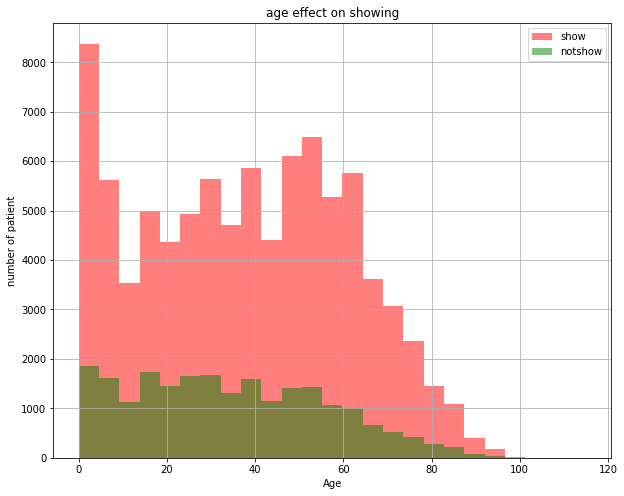

In [315]:
#i will plot age colunm and no_show to ask the qestion 
plt.figure(figsize=[10,8])
df.Age[show].hist(alpha=0.5, bins=25, label='show', color='red')
df.Age[notshow].hist(alpha=0.5, bins=25, label='notshow', color='green')
plt.title('age effect on showing')
plt.xlabel('Age')
plt.ylabel('number of patient')
plt.legend();

It has been observed that age has an effect

In [316]:
df.Age[show].mean()

37.790504154999034

In [317]:
df.Age[notshow].mean()

34.317666562121957

The percentage of show is highest of no show 
and children from 0 to 9 and older from 50 lend to show up more 

# ratio bettween showing and no showing in the dataset generally

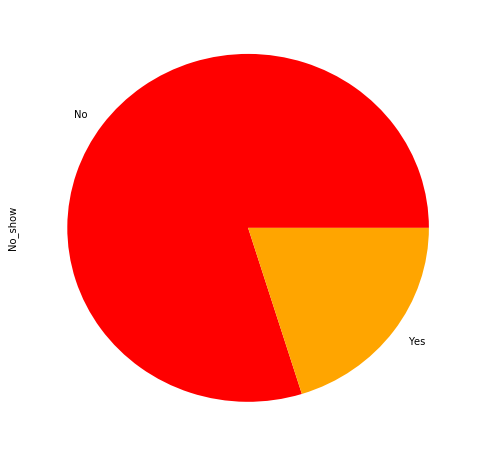

In [318]:
# ratio bettween showing and no showing in the dataset generally
df.No_show.value_counts().plot.pie(figsize=[8.1,8], colors=['red', 'orange'])
plt.show()

# is scholarship effect on showing?

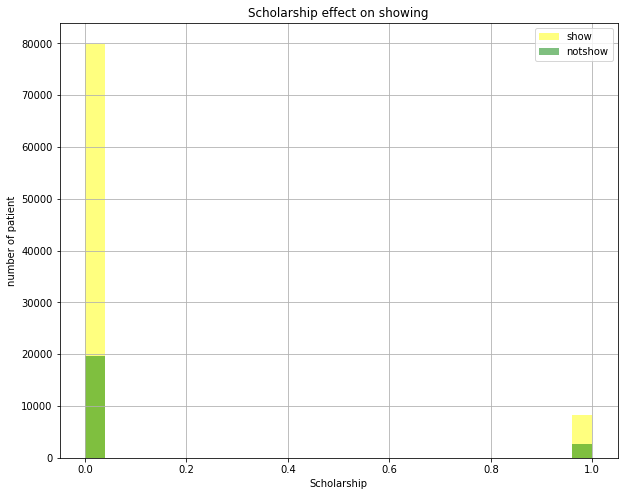

In [319]:
#to show the ratio bettween patient with schlarship and showing
plt.figure(figsize=[10,8])
df.Scholarship[show].hist(alpha=0.5, bins=25, label='show', color='yellow')
df.Scholarship[notshow].hist(alpha=0.5, bins=25, label='notshow', color='green')
plt.title('Scholarship effect on showing')
plt.xlabel('Scholarship')
plt.ylabel('number of patient')
plt.legend();


## Conclusions

> The percentage of show is highest of no show and children from 0 to 9 and older from 50 lend to show up more

> scholarship effect in showing 

> patient who show is bigger than no show 

> receving sms did not increase attending the patient to his appointment

> there is no ratio bettween gender alone and attending to appointment

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])